In [4]:
import wfdb
from wfdb import processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
PATH = 'a01'

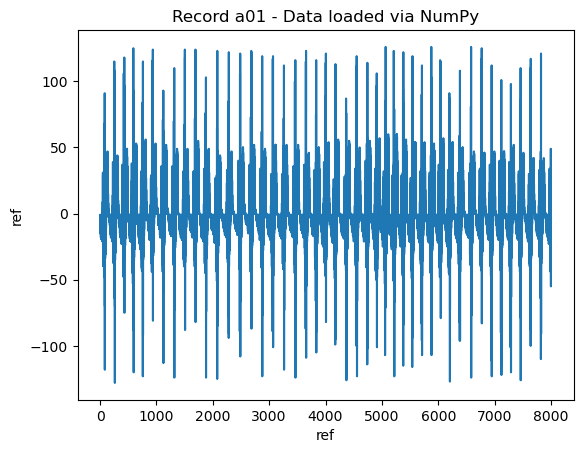

In [5]:
data = np.fromfile(f'{PATH}.dat', dtype='byte')
data = data[0:8000]
x = np.arange(0, data.size)

plt.plot(x, data)
plt.title("Record a01 - Data loaded via NumPy")
plt.xlabel("ref")
plt.ylabel("ref")
plt.show()

In [8]:
record = wfdb.rdrecord(PATH, sampto=2000)
df = record.to_dataframe()
df['time'] = df.index.microseconds / 1000 + df.index.seconds * 1000
df = df[['time', 'ECG']]
df.reset_index(drop=True, inplace=True)
df.head()

,time,ECG
0,0.0,-0.060
1,10.0,-0.065
2,20.0,-0.060
3,30.0,-0.075
4,40.0,-0.065


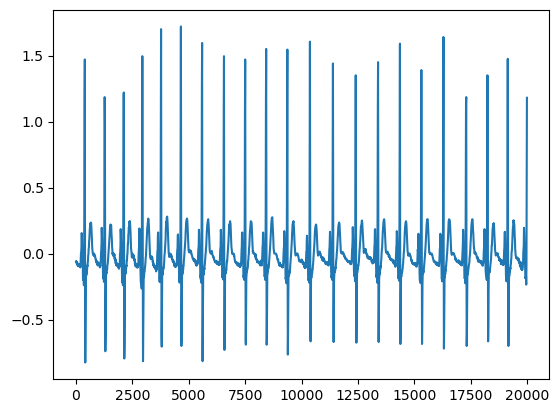

In [9]:
plt.plot(df['time'], df['ECG'])

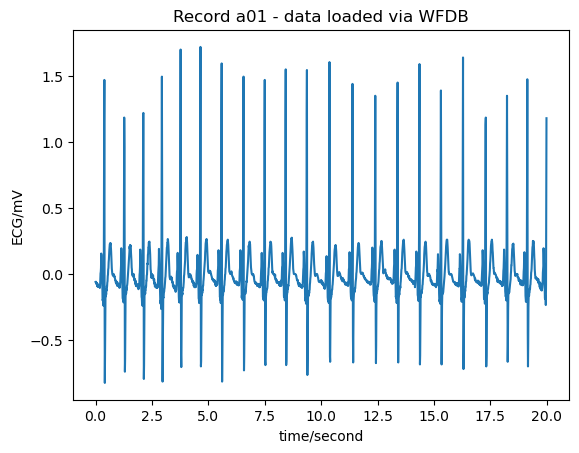

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [-0.08 ],
        [ 0.445],
        [ 1.18 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [12],
 'adc_zero': [0],
 'init_value': [-12],
 'checksum': [28],
 'block_size': [0]}

In [10]:
record = wfdb.rdrecord(PATH, channels=[0], sampto=2000)
wfdb.plot_wfdb(record=record, title='Record a01 - data loaded via WFDB')
display(record.__dict__)

In [6]:
record = wfdb.rdrecord(PATH, sampto = 8000)
df = record.to_dataframe().values

for i, j in zip(data[0:15], df):
    print(f'Numpy: {i} \t Physionet: {j}')

Numpy: -12 	 Physionet: [-0.06]
Numpy: -1 	 Physionet: [-0.065]
Numpy: -13 	 Physionet: [-0.06]
Numpy: -1 	 Physionet: [-0.075]
Numpy: -12 	 Physionet: [-0.065]
Numpy: -1 	 Physionet: [-0.07]
Numpy: -15 	 Physionet: [-0.07]
Numpy: -1 	 Physionet: [-0.09]
Numpy: -13 	 Physionet: [-0.08]
Numpy: -1 	 Physionet: [-0.095]
Numpy: -14 	 Physionet: [-0.08]
Numpy: -1 	 Physionet: [-0.095]
Numpy: -14 	 Physionet: [-0.08]
Numpy: -1 	 Physionet: [-0.095]
Numpy: -18 	 Physionet: [-0.085]


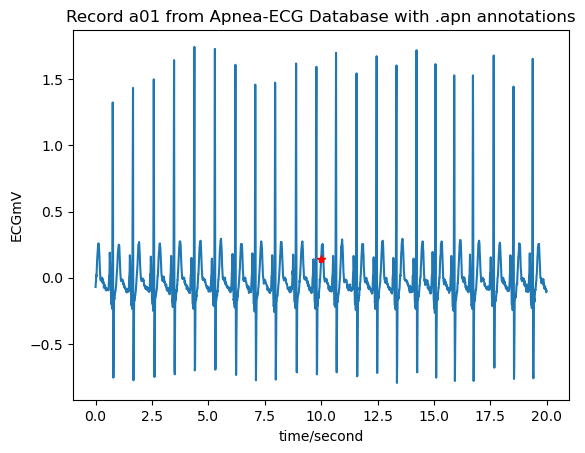

In [7]:
samp = [5000, 7000]
record = wfdb.rdrecord(PATH, sampfrom=samp[0], sampto=samp[1])
annotation = wfdb.rdann(PATH, 'apn', sampfrom=samp[0], sampto=samp[1], shift_samps=True)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record a01 from Apnea-ECG Database with .apn annotations',
               time_units='seconds')

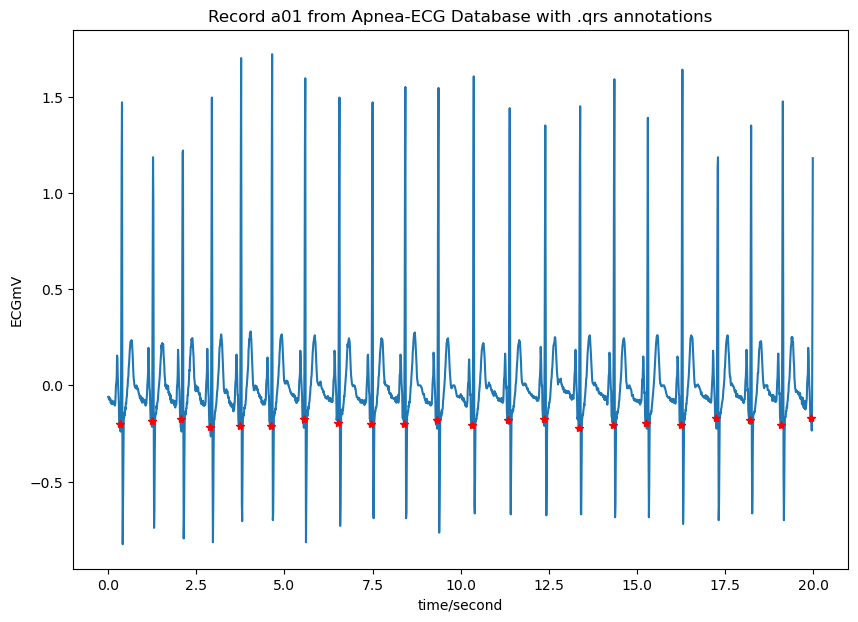

In [8]:
record = wfdb.rdrecord(PATH, sampto = 2000)
annotation = wfdb.rdann(PATH, 'qrs', sampto = 2000)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record a01 from Apnea-ECG Database with .qrs annotations',
               time_units='seconds',
               figsize=(10,7))

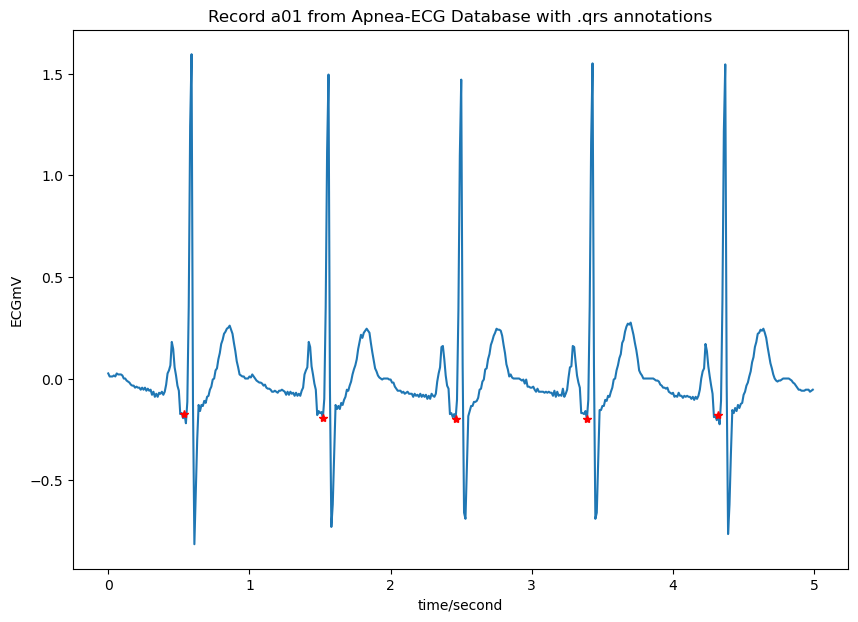

In [9]:
record = wfdb.rdrecord(PATH, sampfrom=500, sampto = 1000)
annotation = wfdb.rdann(PATH, 'qrs', sampfrom=500, sampto = 1000, shift_samps=True)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record a01 from Apnea-ECG Database with .qrs annotations',
               time_units='seconds',
               figsize=(10,7))

/tmp/ipykernel_3931/3403975598.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',
/tmp/ipykernel_3931/3403975598.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',


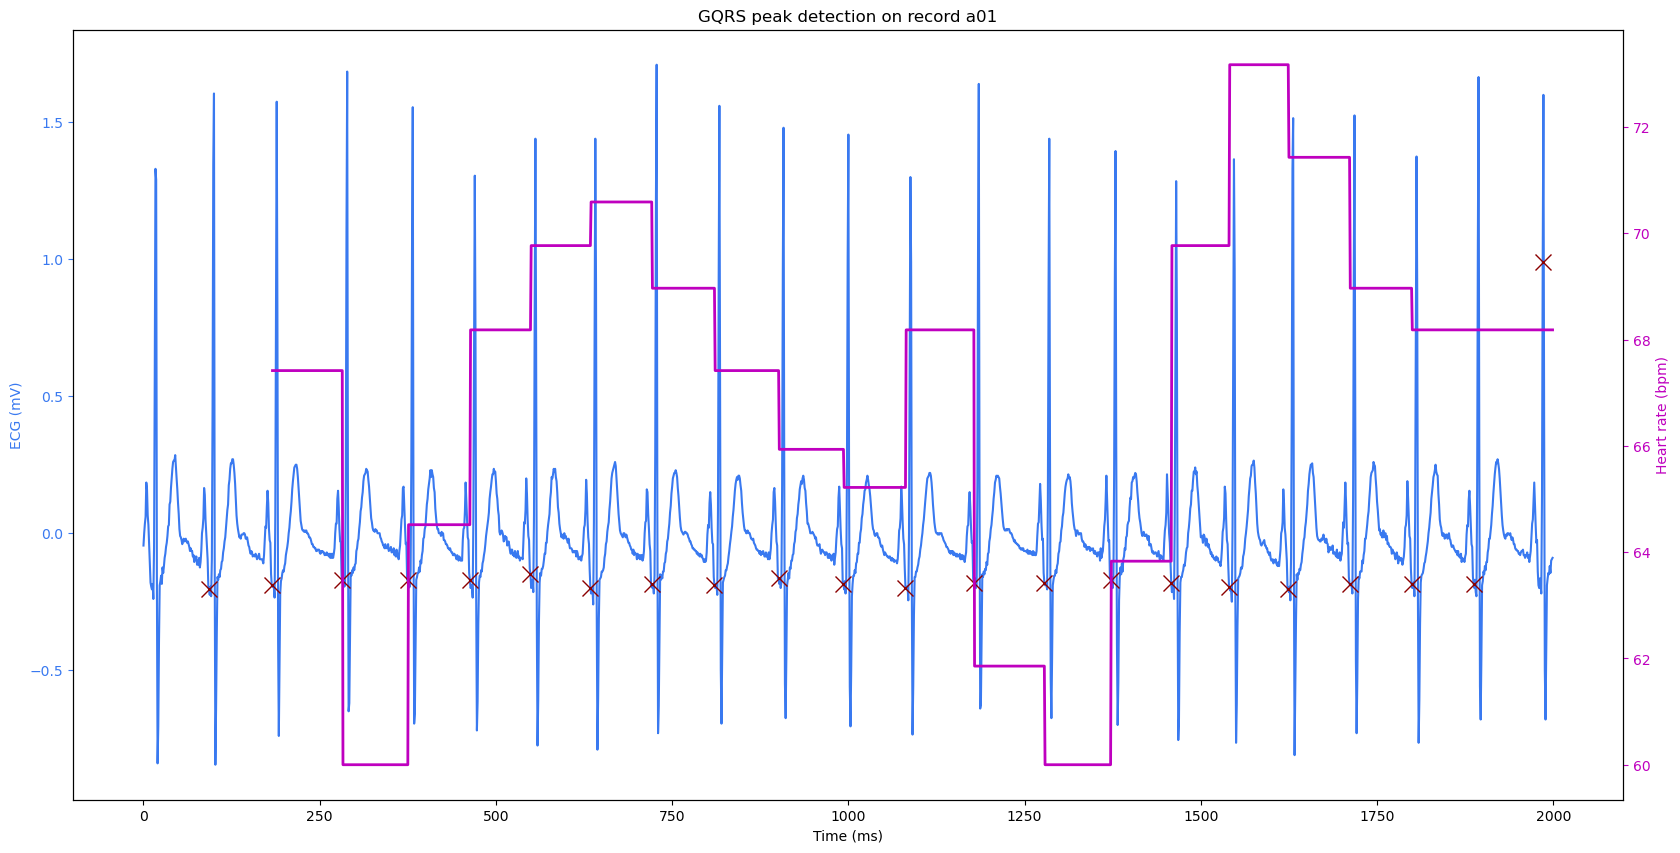

Corrected GQRS detected peak indices: [100, 189, 289, 382, 470, 556, 641, 728, 817, 908, 1000, 1088, 1185, 1285, 1379, 1465, 1547, 1631, 1718, 1806, 1894, 1986]


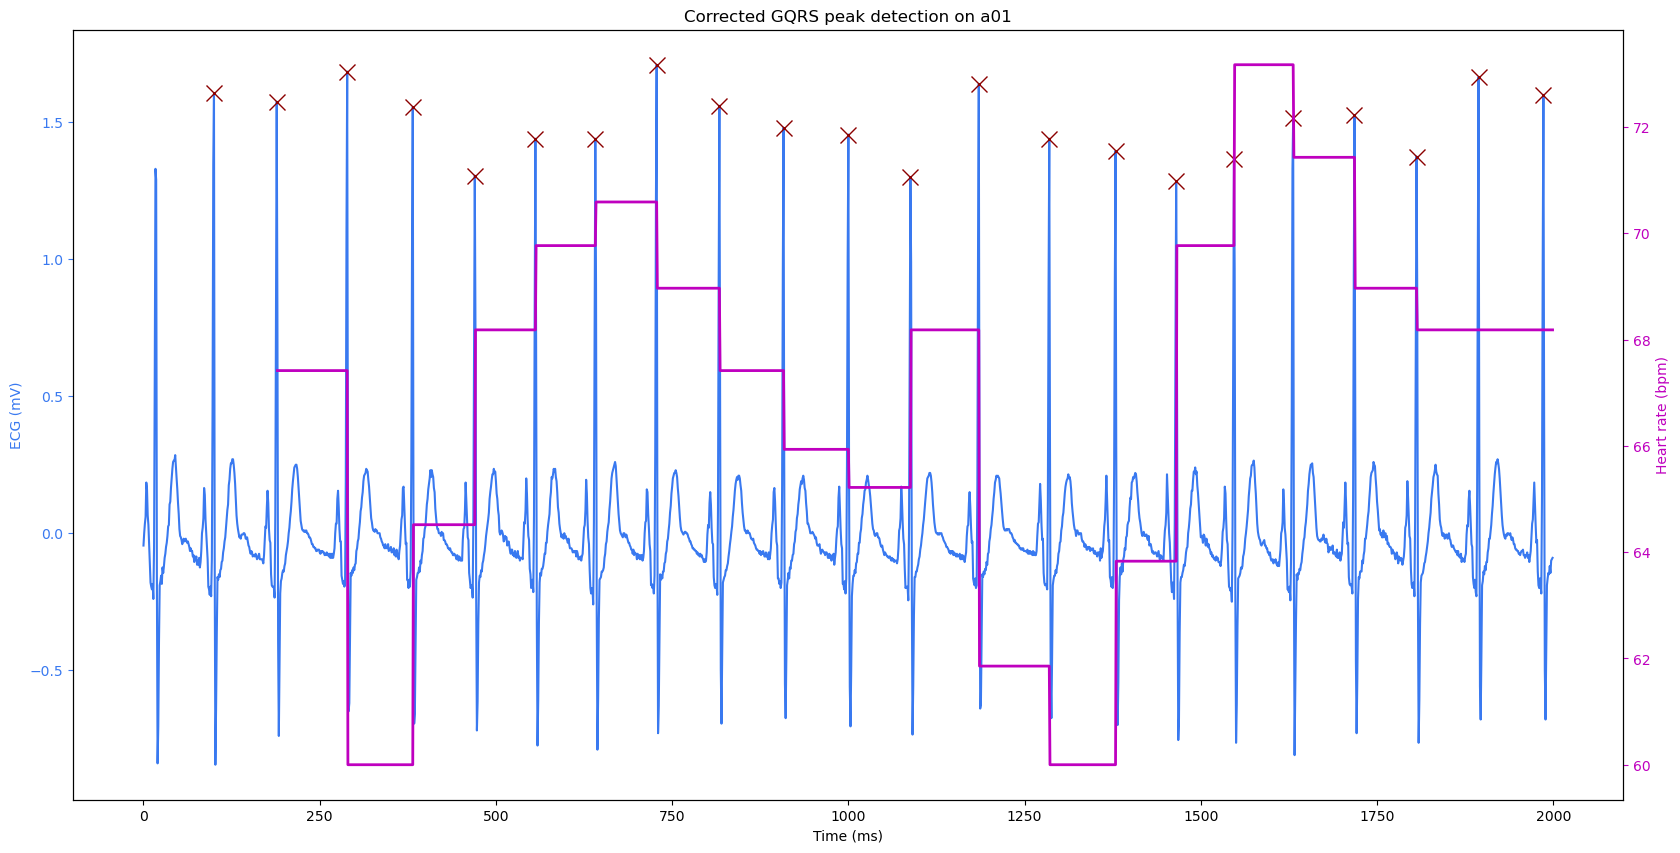

In [10]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord('database/a01', sampfrom=3000, sampto=5000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=200)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record a01")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on a01")

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
22 reference annotations, 22 test annotations

True Positives (matched samples): 22
False Positives (unmatched test samples): 0
False Negatives (unmatched reference samples): 0

Sensitivity: 1.0000 (22/22)
Positive Predictivity: 1.0000 (22/22)


/home/staszek/anaconda3/envs/um/lib/python3.10/site-packages/wfdb/processing/evaluate.py:403: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


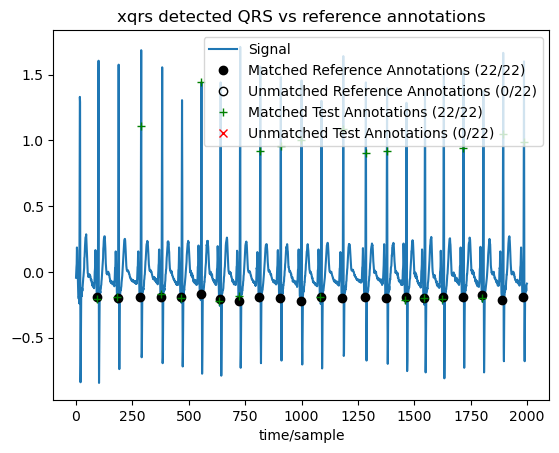

In [11]:
sig, fields = wfdb.rdsamp(PATH, channels=[0], sampfrom=3000, sampto=5000)
ann_ref = wfdb.rdann(PATH,'qrs', sampfrom=3000, sampto=5000, shift_samps=True)

# Run QRS detection on signal
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
# Alternatively, use the gateway function to get the QRS indices directly
# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

# Compare detected QRS complexes to reference annotation.
# Note, first sample in 100.atr is not a QRS.
comparitor = processing.compare_annotations(ref_sample=ann_ref.sample[1:],
                                            test_sample=xqrs.qrs_inds,
                                            window_width=int(0.1 * fields['fs']),
                                            signal=sig[:,0])

# Print and plot the results
comparitor.print_summary()
comparitor.plot(title='xqrs detected QRS vs reference annotations')